# Homework 07: Nonlinear Optimization/Traveling Salesperson

MSCA 32013 Optimization and Simulation Methods. University of Chicago.

Group 7. Ben Ossyra, Peter Pezon. Yawen Zhang. 

## Q.1. Constrained optimization

Consider the following optimization problem:

$ \max_{x} x_{1}^{0.5} x_{2}^{0.5} $

$ s.t. \ \ \ \ 0.5 x_{1} + x_{2} = 1 $

$ \ \ \ \ \ \ \ \ \ \ x_1, x_2 \geq 0 $ 

### A. Rewrite the above as an unconstraint problem (use the linear constraint to substitute out $x_2$)

Let $ f(x_1, x_2) = x_{1}^{0.5} x_{2}^{0.5} $.

Let $ g(x_1, x_2) = 0.5 x_{1} + x_{2} $.

Let $ x_2 = 1 - 0.5 x_1 $.

Substitute $x_2$ in $f$:

$ f(x_1) = x_{1}^{0.5} x_{2}^{0.5} $

$ =  x_{1}^{0.5} (1 - 0.5 x_1)^{0.5} $

$ = \sqrt{x_1} \sqrt{1 - \frac{x_1}{2}} $

Thus the optimization problem can be rewritten as the following unconstraint problem:

$ \max_{x} x_{1}^{0.5} (1 - 0.5 x_1)^{0.5} $

$ \ \ \ \ \ \ \ \ \ \ x_1 \geq 0 $ 


#### i. Plots the objective function for the feasible range for $x_1$

The feasible region for the objective function is where $f(x)$ is within the set of Real Numbers, which occurs when $x_1 \geq 0$ and $1 - 0.5 x_1 \geq 0$.

$1 - 0.5 x_1 \geq 0$

$x_1 \leq \frac{-1}{-0.5}$

$x_1 \leq 2$ 

Therefore, the feasible region for $x_1$ is $\{x_1: 0 \leq x_1\leq 2\}$.

Below, we plot the function $f(x_1)$ for the feasible range. We can see that the function is only continuous on the Real Number line within the feasible region, and that the objective value is maximum at $x \approx 1$, an interior point.

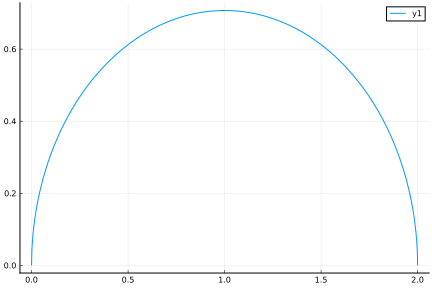

In [12]:
#using Pkg;
#Pkg.add("Plots")
#Pkg.add("PythonPlot")
using Plots
pythonplot()

x = 1:0.5:20
y = 1:0.5:10

f(x) = begin
        sqrt(x) * sqrt(1 - 0.5 * x)
    end

plot(f, 0, 2)

#### ii. Write down the first order condition and find the solution (assume an interior solution).

The points at which the first-order derivative is equal to zero characterize the local minima, maxima and saddle points of the $f(x)$. Because $f(x)$ is univariate, finding the $\frac{d}{dx_1}$ will suffice as the gradient of $f$.

$ \frac{d}{dx_1} f(x_1) = \frac{d}{dx_1} x_1^{0.5} (1 - 0.5 x_1)^{0.5} = 0 $

Fortunately, this problem can be solved by hand with a closed-form solution.

$ \frac{d}{dx_1} f(x_1) = \frac{0.5 (1 - 0.5 x_1)^{0.5}}{x_1^{0.5}} - \frac{0.25 x_1^{0.5}}{1 - 0.5 x_1^{0.5}} $

We can try to verify that at $x = 1$, $ \frac{d}{dx_1} f(x_1) \approx 0$, indicating that $x_1 \approx 1$ is close to a critical point.

In [13]:
using Calculus

f(x) = sqrt(x) * sqrt(1 - 0.5 * x)

derivative(f, 1.0)

0.0

We can also use Julia to derive the first order derivative.

In [34]:
differentiate("sqrt(x) * sqrt(1 - 0.5 * x)", :x)

:((1 * ((1 / 2) / sqrt(x))) * sqrt(1 - 0.5x) + sqrt(x) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))))

$ \frac{d}{dx_1} f(x_1) = ((1 * \frac{\frac{1}{2}}{\sqrt{x_1}}) * \sqrt{1 - 0.5 x_1} + \sqrt{x_1} * ((0 - (0 * x_1 + 0.5 * 1)) * (\frac{\frac{1}{2}}{\sqrt{1 - 0.5 x_1}})) $

$ = \frac{\frac{1}{2}}{\sqrt{x_1}} \sqrt{0.5 x_1} -0.5 \sqrt{x_1} (\frac{\frac{1}{2}}{\sqrt{1 - 0.5 x_1}}) $

$ = \frac{\sqrt{1 - 0.5 x_1}}{2 \sqrt{x_1}} - \frac{\sqrt{0.25 x_1})}{\sqrt{1 - 0.5 x_1}} $

At the optimal point $x = 0$, the second derivative of the objective function is:

$ \frac{d}{dx_1} f(x_1 = 1) = \frac{\sqrt{1 - 0.5 * 1}}{2 \sqrt{1}} - \frac{\sqrt{0.25 * 1})}{\sqrt{1 - 0.5 * 1}} $

$ = \frac{\sqrt{1 - 0.5}}{2 \sqrt{1}} - \frac{\sqrt{0.25}}{\sqrt{1 - 0.5}} $

$ = \frac{\sqrt{0.5}}{2} - \frac{\sqrt{0.25}}{\sqrt{0.5}} $

$ \approx 5.55112×10^-17 $

This is close enough to zero to suggest that at $x=1.0$, we are near to a local maxima. 

Confirming by evaluating the first-order derivative at $x = 1.0$. 

In [39]:
#using Pkg
#Pkg.add("ForwardDiff")
using ForwardDiff

dfdx = x -> ForwardDiff.derivative(f, x)
dfdx(1)

5.551115123125783e-17

$ \frac{d}{dx_1} f(x_1 = 1) \approx 0 $ suggests this is an inflection point. With the first order condition is met, and we evaluate second order conditions at the critical point $x_1$ to understand whether $f$ is at a local maxima or minima at $x_1$.

#### iii. Derive the second derivative of the objective function at the optimal.

Using Julia to derive the second derivative symbolically:

In [40]:
differentiate("((1 * ((1 / 2) / sqrt(x))) * sqrt(1 - 0.5x) + sqrt(x) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))))", :x)

:(((0 * ((1 / 2) / sqrt(x)) + 1 * ((-(1 * ((1 / 2) / sqrt(x))) * (1 / 2)) / sqrt(x) ^ 2)) * sqrt(1 - 0.5x) + (1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x)))) + ((1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) + sqrt(x) * ((0 - ((0 * x + 0 * 1) + (0 * 1 + 0.5 * 0))) * ((1 / 2) / sqrt(1 - 0.5x)) + (0 - (0 * x + 0.5 * 1)) * ((-((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) * (1 / 2)) / sqrt(1 - 0.5x) ^ 2))))

$ \frac{d^2}{dx_1^2} f(x_1) = (((0 * ((1 / 2) / sqrt(x)) + 1 * ((-(1 * ((1 / 2) / sqrt(x))) * (1 / 2)) / sqrt(x) ^ 2)) * sqrt(1 - 0.5x) + (1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x)))) + ((1 * ((1 / 2) / sqrt(x))) * ((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) + sqrt(x) * ((0 - ((0 * x + 0 * 1) + (0 * 1 + 0.5 * 0))) * ((1 / 2) / sqrt(1 - 0.5x)) + (0 - (0 * x + 0.5 * 1)) * ((-((0 - (0 * x + 0.5 * 1)) * ((1 / 2) / sqrt(1 - 0.5x))) * (1 / 2)) / sqrt(1 - 0.5x) ^ 2)))) $

$ = - \frac{0.5}{(2 - x_1) \sqrt{1 - 0.5 x_1} x_1^{\frac{3}{2}}} $

#### iv. Evaluate the second derivative at the optimal value of $x_1$ and for the entire feasible range. Plots your results.

At the optimal point $x = 1.0$, the second derivative of the objective function is:

$ \frac{d^2}{dx_1^2} f(x_1 = 1) = - \frac{0.5}{(2 - 1) \sqrt{1 - 0.5} 1^{\frac{3}{2}}} $

$ = - \frac{1}{2\sqrt{\frac{1}{2}}} $

$ \approx -0.707107 $

$ \frac{d^2}{dx_1^2} f(x_1 = 1) < 0 $ suggests that $x_1$ is at a local maxima.

Confirming by evaluating the second derivative with Julia below.

In [60]:
using ForwardDiff

dfdx = x -> ForwardDiff.derivative(f, x)
d2fdx2 = x -> ForwardDiff.derivative(dfdx, x)
d2fdx2(1)

-0.7071067811865475

That is approximate to the value we found above, $-0.7071$.

Below, we plot the second derivative $\frac{d^2}{dx_1^2}$ (green line), along with $\frac{d}{dx_1}$ (red line) and $f$ (blue line) for reference. $x=0$ does appear to be approximately where the minimum, and critical point of the first and second derivatives lie.

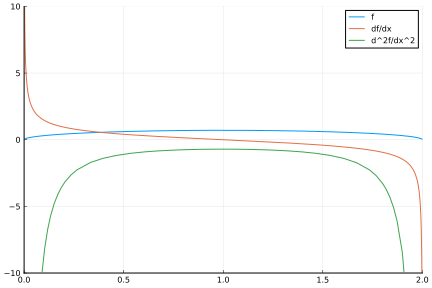

In [59]:
using ForwardDiff, Plots
pythonplot()

x = 1:0.5:20

dfdx = x -> ForwardDiff.derivative(f, x)
d2fdx2 = x -> ForwardDiff.derivative(dfdx, x)

plot(
    [f, dfdx, d2fdx2],
    xlims=[0, 2],
    ylims=[-10, 10],
    label=["f" "df/dx" "d^2f/dx^2"]
)

#### v. Find the solution using a `Optim` package, and the `GoldenSection()` solver option.


### B. Write out the lagrange of the original optimization problem

#### i. Derive the first order conditions


#### ii. Solve the first order conditions and find the LaGrange multiplier value


### C. Find the solution to the original problem using Julia's `NLopt` and the `LD_SLSQP` solver.

## Q.2.

You were given a sample of size $N$ containing a response variable $y$ and predictors $x_j, j=1,2,...,k$. Let $y$ be a $N×1$ vector with values for response varaible, and $X$ be a $N×k$ matrix containing the values for each predictor. Assume that the first predictor takes the value of $1$ for every observation. Lately, assume that the response variable $y$ is lienarly related to the predictors.

### A. Write out the least-squares minimization problem in matrix for


### B. Write out the first order conditions, and derive the closed-form solution, $\beta$ in matrix notation.


### C. Given the dataset provided


#### i. Create the matrix $y$ and $X$ and compute the value of $\beta$ 


#### ii. Compute the optimal $\beta$ using a Julia optimization solver.